# Figures & Tables
for the AGENT historical **wheat** (and spelt) data paper  

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Data points

In [2]:
all_rows <- list.files(recursive=TRUE, pattern="(wheat|spelt)\\.csv$") |>
                set_names(basename) |>
                map(read_csv, show_col_types=FALSE) |>
                map(mutate, accenumb = as.character(accenumb)) |>
                map(mutate, doi = as.character(doi)) |>
                list_rbind(names_to = "dataset") |>
                mutate(dataset = gsub(".csv", "", dataset))
glimpse(all_rows)

Rows: 123,472
Columns: 60
$ dataset                                     <chr> "CREA_wheat", "CREA_wheat"…
$ accenumb                                    <chr> "TA00001", "TA00001", "TA0…
$ agent_id                                    <chr> NA, NA, NA, NA, NA, NA, NA…
$ doi                                         <chr> NA, NA, NA, NA, NA, NA, NA…
$ days_to_heading                             <dbl> 128, 127, 127, 127, 127, 1…
$ plant_height                                <dbl> 74, 84, 78, 80, 66, 68, 68…
$ thousand_kernel_weight                      <dbl> 47.5, 45.8, 46.1, 47.2, 49…
$ powdery_mildew                              <dbl> 3, 5, 3, 5, 3, 0, 0, 2, 0,…
$ leaf_rust                                   <dbl> 3, 3, 1, 3, 3, 0, 0, 2, 4,…
$ yellow_rust                                 <dbl> NA, NA, NA, NA, NA, NA, NA…
$ septoria_tritici_ssp                        <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0,…
$ protein_content                             <dbl> 11.1, 11.2, 10.9, 11.9, 10…
$ sds_sediment

In [3]:
data_points <- all_rows |> select(-c(agent_id, doi, name, description)) |> 
    pivot_longer(cols = -c(dataset, accenumb, campaign), names_to = "trait") |> drop_na() |>
    arrange(campaign, accenumb, trait)
glimpse(data_points)

Rows: 460,399
Columns: 5
$ dataset  <chr> "Agroscope_spelt", "Agroscope_spelt", "Agroscope_spelt", "Agr…
$ accenumb <chr> "TS0073", "TS0073", "TS0073", "TS0074", "TS0074", "TS0074", "…
$ campaign <chr> "1937-1938", "1937-1938", "1937-1938", "1937-1938", "1937-193…
$ trait    <chr> "date_of_flowering", "days_to_flowering", "stem_length", "dat…
$ value    <dbl> 19380620, 170, 150, 19380620, 170, 155, 19380620, 170, 155, 1…


In [4]:
data_points |> count(trait)

trait,n
<chr>,<int>
beginning_of_flowering,2284
beginning_of_flowering_date,2283
beginning_of_flowering_end_of_flowering,2282
beginning_of_heading,3291
beginning_of_heading_beginning_of_flowering,2283
beginning_of_heading_date,3291
beginning_of_heading_end_of_flowering,2282
beginning_of_heading_end_of_heading,2284
black_rust,264


In [5]:
data_points_corrected <- list.files(recursive=TRUE, pattern="(wheat|spelt)_corrected\\.csv$") |>
    set_names(basename) |>
    map(read_csv, show_col_types=FALSE) |>
    map(mutate, accenumb = as.character(accenumb)) |>
    list_rbind(names_to = "dataset") |>
    mutate(dataset = gsub("_corrected.csv", "", dataset))
glimpse(data_points_corrected)

Rows: 212,276
Columns: 5
$ dataset  <chr> "CREA_wheat", "CREA_wheat", "CREA_wheat", "CREA_wheat", "CREA…
$ accenumb <chr> "TA00001", "TA00001", "TA00001", "TA00001", "TA00001", "TA000…
$ campaign <chr> "2005-2006", "2005-2006", "2005-2006", "2005-2006", "2005-200…
$ trait    <chr> "days_to_heading", "days_to_heading", "leaf_rust", "leaf_rust…
$ value    <dbl> 128.0, 127.0, 3.0, 1.0, 74.0, 84.0, 78.0, 80.0, 66.0, 3.0, 5.…


### 3 traits replication years counts

Saving 7 x 7 in image


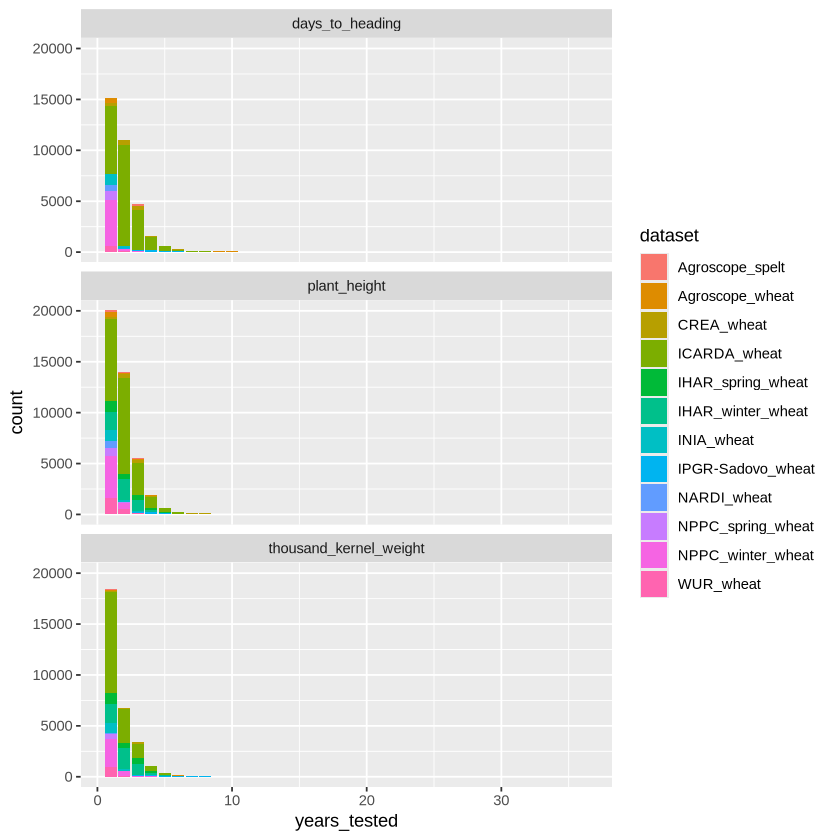

In [6]:
data_points |> filter(trait %in% c("days_to_heading", "plant_height", "thousand_kernel_weight")) |> 
distinct(dataset, campaign, accenumb, trait) |>
summarise(years_tested=n(), .by=c(dataset, accenumb, trait)) |>
ggplot(aes(years_tested, fill=dataset)) + geom_bar() + facet_wrap(~trait, dir="v")
ggsave("replication_years_counts.svg")

### days_to_heading replication years counts
trying out the for individual traits as well in case it's better for the paper 

Saving 7 x 7 in image


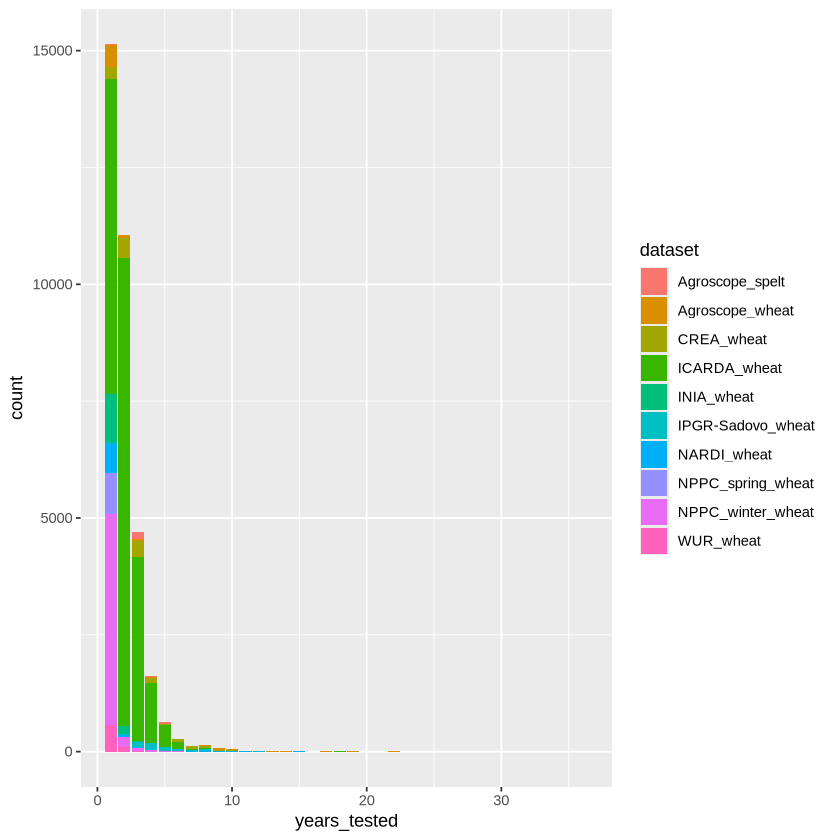

In [7]:
all_rows |> select(dataset, campaign, accenumb, days_to_heading) |> drop_na() |>
distinct(dataset, campaign, accenumb) |>
summarise(years_tested=n(), .by=c(accenumb, dataset)) |> arrange(desc(years_tested)) |>
ggplot(aes(years_tested, fill=dataset))+geom_bar()
ggsave("HT_replication_years_counts.svg")

## Data quality

In [8]:
data_quality <- list.files(recursive=TRUE, pattern="(wheat|spelt)_data_quality\\.csv$") |>
                set_names(basename) |>
                map(read_csv, show_col_types=FALSE) |>
                list_rbind(names_to = "dataset") |>
                mutate(dataset = gsub("_data_quality.csv", "", dataset))
data_quality

dataset,trait,heritability,var_G,var_E,no_campaigns
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
CREA_wheat,days_to_heading,0.883,32.238,19.884,4.668
CREA_wheat,plant_height,0.947,425.644,119.755,5.013
CREA_wheat,thousand_kernel_weight,0.872,27.826,21.587,5.288
CREA_wheat,powdery_mildew,0.040,0.073,4.424,2.535
CREA_wheat,leaf_rust,0.370,0.496,2.718,3.220
CREA_wheat,septoria_tritici_ssp,0.067,0.035,1.738,3.572
CREA_wheat,protein_content,0.756,1.093,2.688,7.629
CREA_wheat,sds_sedimentation_volume,0.913,66.261,46.837,7.432
ICARDA_wheat,days_to_heading,0.657,38.227,90.886,4.547


## Accessions and BLUE values

In [9]:
BLUE_values <- list.files(recursive=TRUE, pattern="(wheat|spelt)_BLUE_values\\.csv$") |>
                set_names(basename) |>
                map(read_csv, show_col_types=FALSE) |>
                map(mutate, genotype = as.character(genotype)) |>
                list_rbind(names_to = "dataset") |>
                mutate(dataset = gsub("_BLUE_values.csv", "", dataset))
glimpse(BLUE_values)

Rows: 43,293
Columns: 13
$ dataset                       <chr> "CREA_wheat", "CREA_wheat", "CREA_wheat"…
$ genotype                      <chr> "TA00001", "TA00002", "TA00003", "TA0000…
$ days_to_heading_BLUE          <dbl> 126.22, 124.81, 123.82, 123.23, 123.03, …
$ plant_height_BLUE             <dbl> 67.69, 66.66, 64.05, 68.51, 97.52, 77.64…
$ thousand_kernel_weight_BLUE   <dbl> 39.33, 26.82, NA, NA, 37.58, 34.15, NA, …
$ powdery_mildew_BLUE           <dbl> 2.76, 1.17, 4.53, 1.97, 1.48, 1.17, 0.10…
$ leaf_rust_BLUE                <dbl> 2.61, 1.89, 3.66, 2.00, 3.56, 2.66, 2.74…
$ septoria_tritici_ssp_BLUE     <dbl> 3.38, 3.28, NA, 3.54, 3.10, 3.22, 3.08, …
$ protein_content_BLUE          <dbl> 13.16, 14.32, NA, NA, 14.40, 13.03, NA, …
$ sds_sedimentation_volume_BLUE <dbl> 44.75, 44.21, NA, NA, 57.05, 45.18, NA, …
$ end_of_heading_BLUE           <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ plant_density_BLUE            <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ dry_matter_yi

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Warning message:
“Removed 34120 rows containing non-finite outside the scale range (`stat_density()`).”


Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 34316 rows containing missing values”


Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 38353 rows containing missing values”


Warning message:
“Removed 34316 rows containing missing values or values outside the scale range (`geom_point()`).”


Warning message:
“Removed 20374 rows containing non-finite outside the scale range (`stat_density()`).”


Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 31916 rows containing missing values”


Warning message:
“Removed 38353 rows containing missing values or values outside the scale range (`geom_point()`).”


Warning message:
“Removed 31916 rows containing missing values or values outside the scale range (`geom_point()`).”


Warning message:
“Removed 31719 rows containing non-finite outside the scale range (`stat_density()`).”


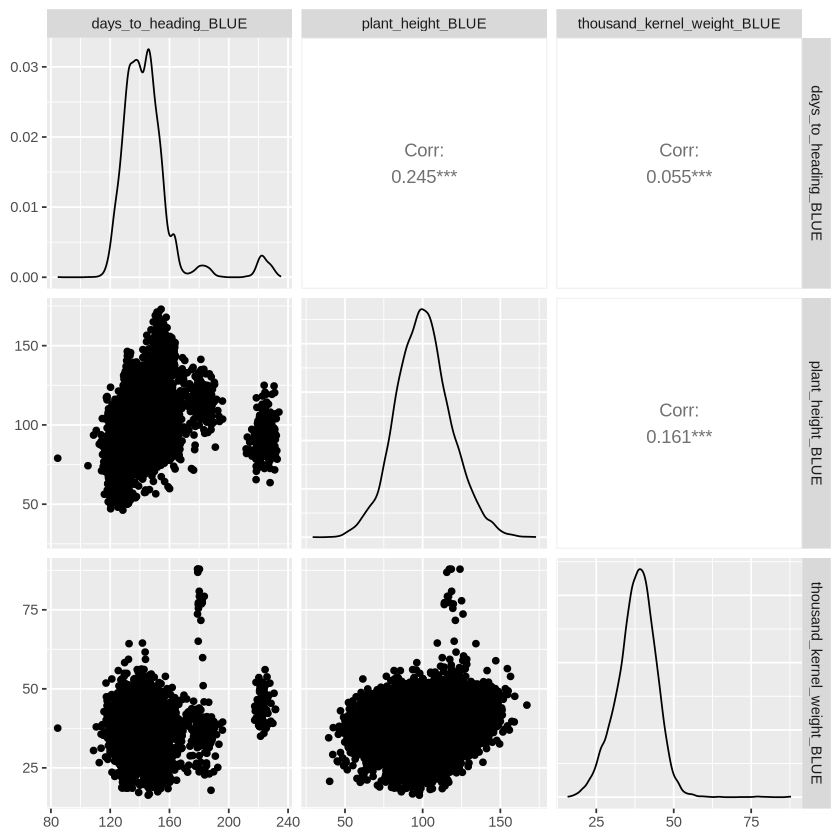

In [10]:
BLUE_values |> GGally::ggpairs(columns=c("days_to_heading_BLUE", "plant_height_BLUE", "thousand_kernel_weight_BLUE"))

In [11]:
library(gt)

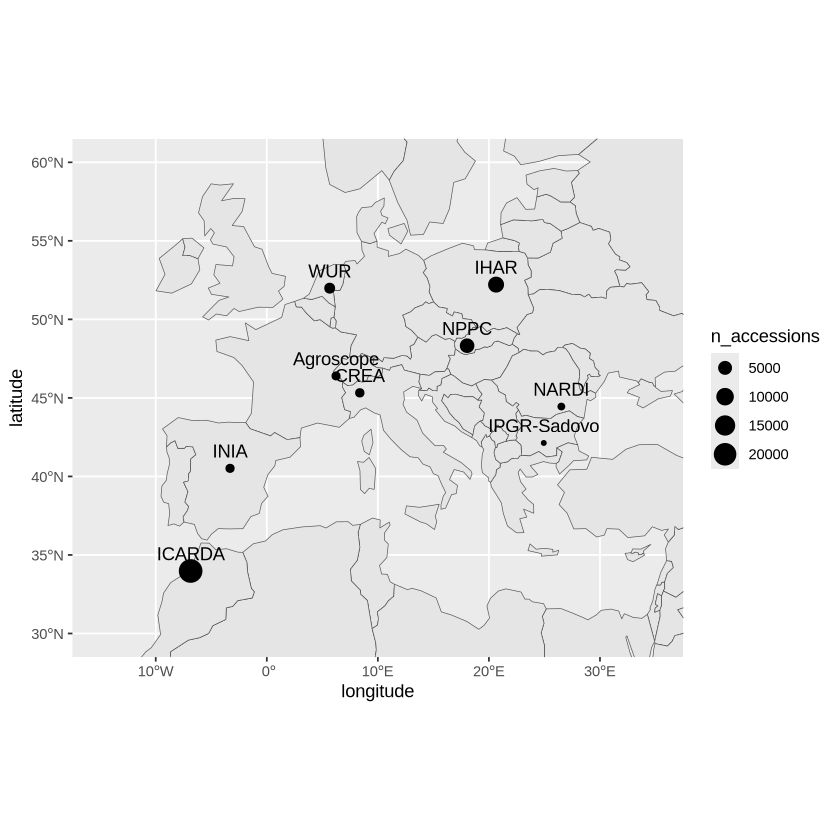

In [12]:
genebank_locations = tribble(
    ~genebank,      ~latitude,   ~longitude,
    "Agroscope",    46.399,      6.232,
    "CREA",         45.323,      8.373,
    "ICARDA",       33.980,      -6.860,
    "IHAR",         52.214,      20.644,
    "INIA",         40.515,      -3.311,
    "IPGR-Sadovo",  42.131,      24.940,
    "NARDI",        44.450,      26.522,
    "NPPC",         48.325,      18.035,
    "WUR",          51.986,      5.663,
)

accessions_counts <- BLUE_values |> select(dataset) |> 
    mutate(genebank = str_split_i(dataset, "_", 1)) |> count(genebank, name="n_accessions") |> 
    left_join(genebank_locations, by="genebank")

base_sf <- rnaturalearth::ne_countries(continent = c("europe", "asia", "africa"), returnclass = "sf") |> select(name, geometry)

ggplot(accessions_counts) + geom_sf(data=base_sf) +
coord_sf(xlim = c(-15, 35), ylim = c(30, 60)) +
geom_point(aes(x = longitude, y = latitude, size = n_accessions)) +
geom_text(aes(x = longitude, y = latitude, label = genebank), nudge_y=1.1)

In [13]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 24.04.1 LTS

Matrix products: default
BLAS/LAPACK: /home/erwan/micromamba/envs/R/lib/libopenblasp-r0.3.28.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Paris
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] gt_0.11.1       lubridate_1.9.3 forcats_1.0.0   stringr_1.5.1  
 [5] dplyr_1.1.4     purrr_1.0.2     readr_2.1.5     tidyr_1.3.1    
 [9] tibble_3.2.1    ggplot2_3.5.1   tidyverse_2.0.0

loaded via a namespace (and not attache